# **importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read file and check data correlation heatmap

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


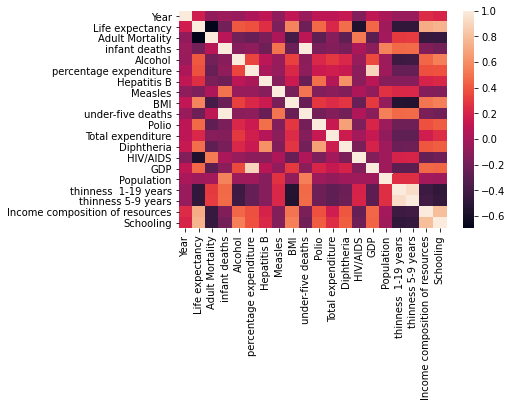

In [2]:
data = pd.read_csv('../input/life-expectancy-who/Life Expectancy Data.csv',sep=r'\s*,\s*')
sns.heatmap(data.corr())

# Trying to identify linearly paired data

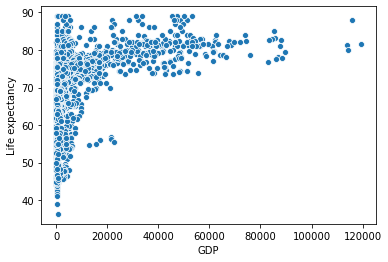

In [3]:
sns.scatterplot(data=data, x="GDP",y="Life expectancy")

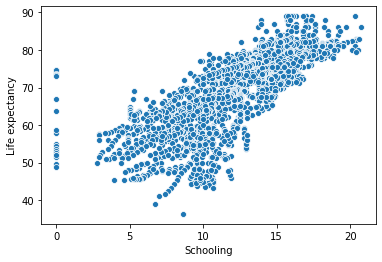

In [4]:
sns.scatterplot(data=data, x="Schooling",y="Life expectancy")

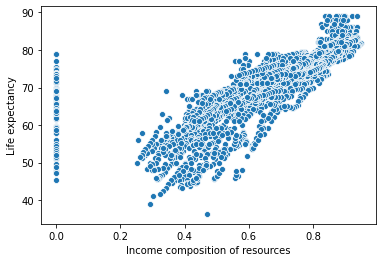

In [5]:
sns.scatterplot(data=data, x="Income composition of resources",y="Life expectancy")

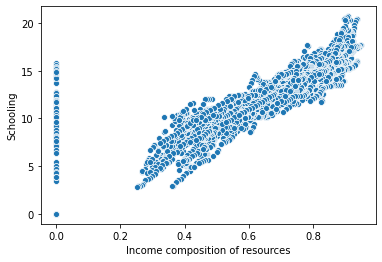

In [6]:
sns.scatterplot(data=data, x="Income composition of resources",y="Schooling")

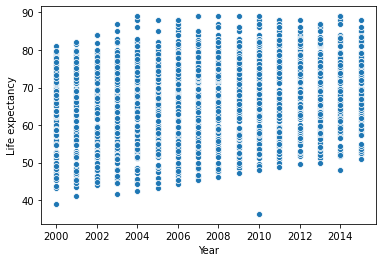

In [7]:
sns.scatterplot(data=data, x="Year",y="Life expectancy")

# Filtering out data for India

In [8]:
data.loc[data['Country'] == "India"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,910,NaN,0.000000,87.0,90387,...,86.0,NaN,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,...,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,...,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7


# India Data Correlation Heatmap

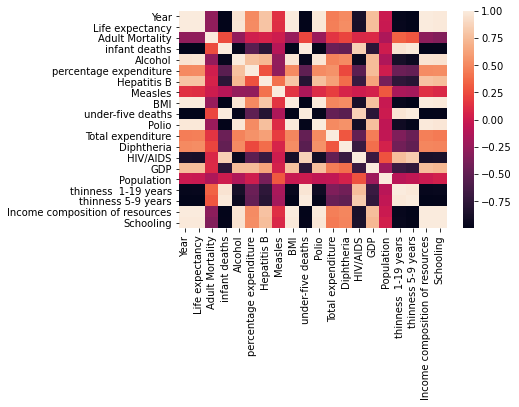

In [9]:
indata = data.loc[data['Country'] == "India"]
sns.heatmap(indata.corr())

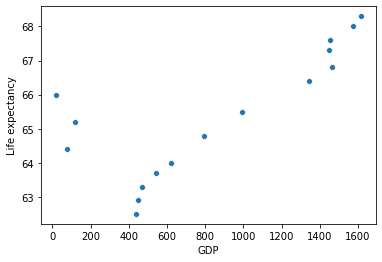

In [10]:
sns.scatterplot(data=indata, x="GDP",y="Life expectancy")

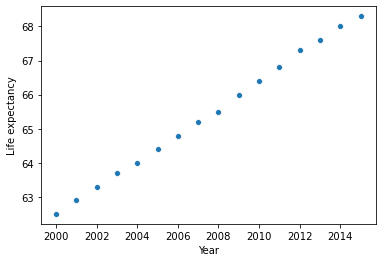

In [11]:
sns.scatterplot(data=indata, x="Year",y="Life expectancy")

# Modeling Year vs Life expectancy

In [12]:
X=indata['Year'].values
Y=indata['Life expectancy'].values

In [13]:
mean_x =np.mean(X)
mean_y =np.mean(Y)
l=len(X)
n=0
d=0
for i in range(l):
    n+=(X[i]-mean_x)*(Y[i]-mean_y)
    d+=(X[i]-mean_x)**2
b1=n/d
b0=mean_y-(b1*mean_x)
print(b1,b0)

0.3919117647058822 -721.3441176470585


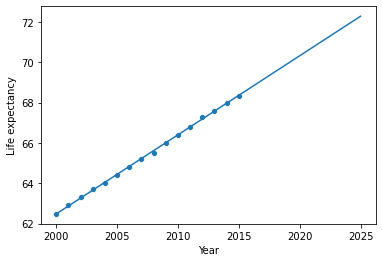

In [14]:
max_x=np.max(X)+10
min_x=np.min(X)
x=np.linspace(min_x,max_x)
y=b0+b1*x

sns.lineplot(x,y)
sns.scatterplot(data=indata, x="Year", y="Life expectancy")

## Calculating r square

In [15]:
ss_t=0
ss_r=0
for i in range(l):
    y_predict=b0+b1*X[i]
    ss_t +=(Y[i]-mean_y)**2
    ss_r +=(Y[i]-y_predict)**2
r2=1-(ss_r/ss_t)
print(r2)

0.9991938609628224


# Predicting life expectancy of current year

In [16]:
print(b0+b1*2021)

70.70955882352939


# Modeling GDP vs Life expectancy

In [17]:
X=indata['GDP'].values
Y=indata['Life expectancy'].values

In [18]:
mean_x =np.mean(X)
mean_y =np.mean(Y)
l=len(X)
n=0
d=0
for i in range(l):
    n+=(X[i]-mean_x)*(Y[i]-mean_y)
    d+=(X[i]-mean_x)**2
b1=n/d
b0=mean_y-(b1*mean_x)
print(b1,b0)

0.002488584842356049 63.333514862192935


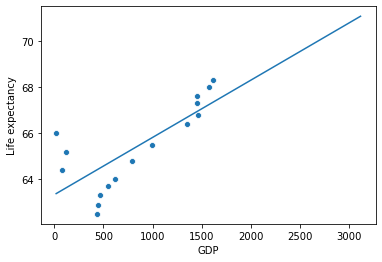

In [19]:
max_x=np.max(X)+1500
min_x=np.min(X)
x=np.linspace(min_x,max_x)
y=b0+b1*x

sns.lineplot(x,y)
sns.scatterplot(data=indata, x="GDP", y="Life expectancy")

## Calculating R square

In [20]:
ss_t=0
ss_r=0
for i in range(l):
    y_predict=b0+b1*X[i]
    ss_t +=(Y[i]-mean_y)**2
    ss_r +=(Y[i]-y_predict)**2
r2=1-(ss_r/ss_t)
print(r2)

0.5822210006406356


# Predicting life expectancy of current GDP

In [21]:
print(b0+b1*2870)

70.47575335975479


The Google Search Result

<a href="https://imgur.com/2eTj9Vz"><img src="https://i.imgur.com/2eTj9Vz.png" title="source: imgur.com" /></a>